#### Importing Libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

#### Importing Deep-Learning Libraries:

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### Displaying Images:

In [3]:
pic_size = 48
folder_path = "D:/AI-ML_STUFF/DATASETS/Emotion_Detection_2"

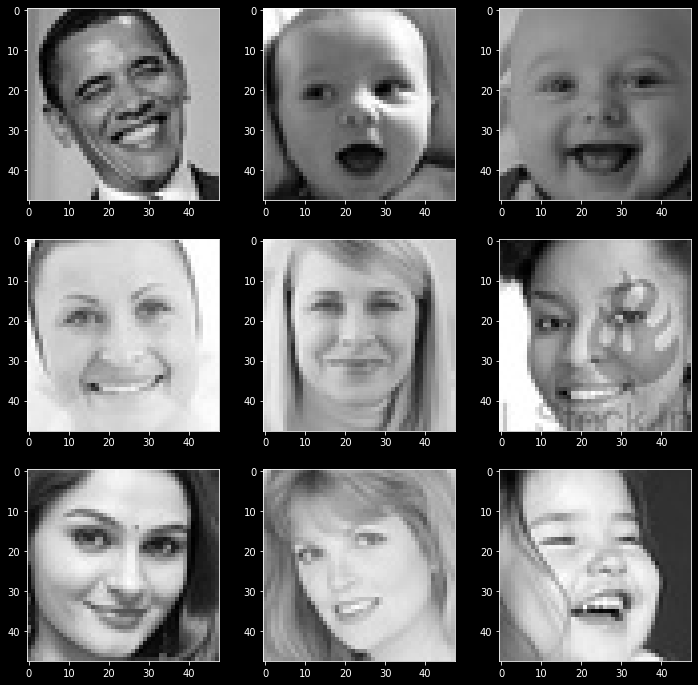

In [16]:
expression = 'Happy'

plt.figure(figsize = (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + "/train/" + expression + "/" +
                   os.listdir(folder_path + "/train/" + expression)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)
plt.show()

### Making Training and Validation Data:

In [6]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                             target_size = (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)


test_size = datagen_val.flow_from_directory(folder_path + "/validation",
                                           target_size = (pic_size,pic_size),
                                           color_mode = 'grayscale',
                                           batch_size = batch_size,
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model Building:

In [7]:
# from tf.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

# 1st CNN Layer:
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd CNN Layer:
model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd CNN Layer:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN Layer:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st Layer:

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd Layer:

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(no_of_classes, activation='softmax'))


opt = Adam(lr = 0.0001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\Acer\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
model.save('model_2.h5')

## Fitting the Model with Training and Validation Data:

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbode=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbode=1,
                                       min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
             optimizer = Adam(lr=0.001),
             metrics=['accuracy'])

In [10]:
train_set.n

28821

In [11]:
history = model.fit_generator(generator = train_set,
                             steps_per_epoch = train_set.n//train_set.batch_size,
                             epochs = epochs,
                             validation_data = test_size,
                             validation_steps = test_size.n//test_size.batch_size,
                             callbacks = callbacks_list)

C:\Users\Acer\AppData\Local\Temp\ipykernel_13200\3226485968.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_set,


Epoch 1/48
225/225 [==============================] - 370s 2s/step - loss: 1.7838 - accuracy: 0.3144 - val_loss: 1.7940 - val_accuracy: 0.2956 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 86s 382ms/step - loss: 1.4329 - accuracy: 0.4459 - val_loss: 1.3675 - val_accuracy: 0.4817 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 13s 58ms/step - loss: 1.2763 - accuracy: 0.5085 - val_loss: 1.1936 - val_accuracy: 0.5531 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 13s 60ms/step - loss: 1.1897 - accuracy: 0.5458 - val_loss: 1.1449 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 13s 59ms/step - loss: 1.1229 - accuracy: 0.5733 - val_loss: 1.1367 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 13s 59ms/step - loss: 1.0779 - accuracy: 0.5896 - val_loss: 1.1299 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 13s 

## Plotting Accuracy and Loss:

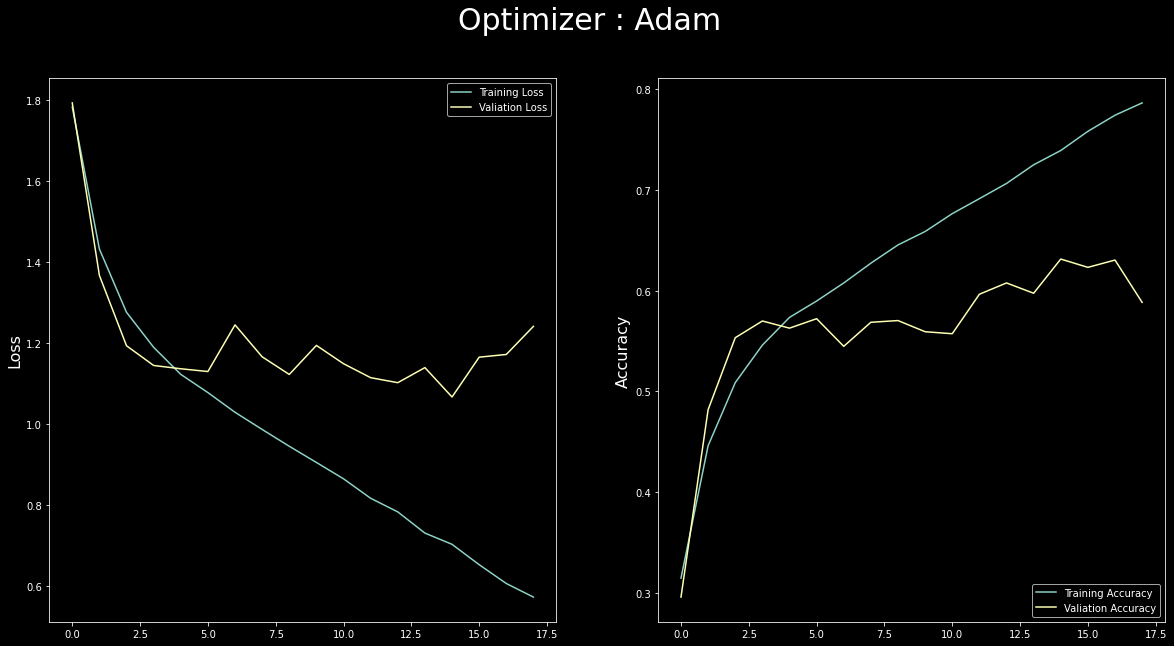

In [15]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))

plt.suptitle('Optimizer : Adam', fontsize = 30)

plt.subplot(1,2,1)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Valiation Loss')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Valiation Accuracy')
plt.legend(loc='lower right')